# Long term deposit Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcome

## 1) Problem statement.

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if term deposit subscribed or not based on the given dataset.


## 2) Data Collection.
* The Dataset is part financial institute


https://www.kaggle.com/datasets/

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



**Import the CSV Data as Pandas DataFrame**

In [68]:
df = pd.read_csv(r"J:\Long-term-deposit-prediction\data\bank-additional-full.csv")

**Show Top 5 Records**

In [69]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Shape of the dataset**

In [70]:
df.shape

(41188, 21)

**Summary of the dataset**

In [71]:
# Display summary statistics for a dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Check Datatypes in the dataset**

In [72]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 3. EXPLORING DATA

In [73]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [74]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
---------------------------
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
---------------------------
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
---------------------------
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64
---------------

**Insights**
 - We got the unknown category in each feature and all the opertaion is operated in weekdays

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

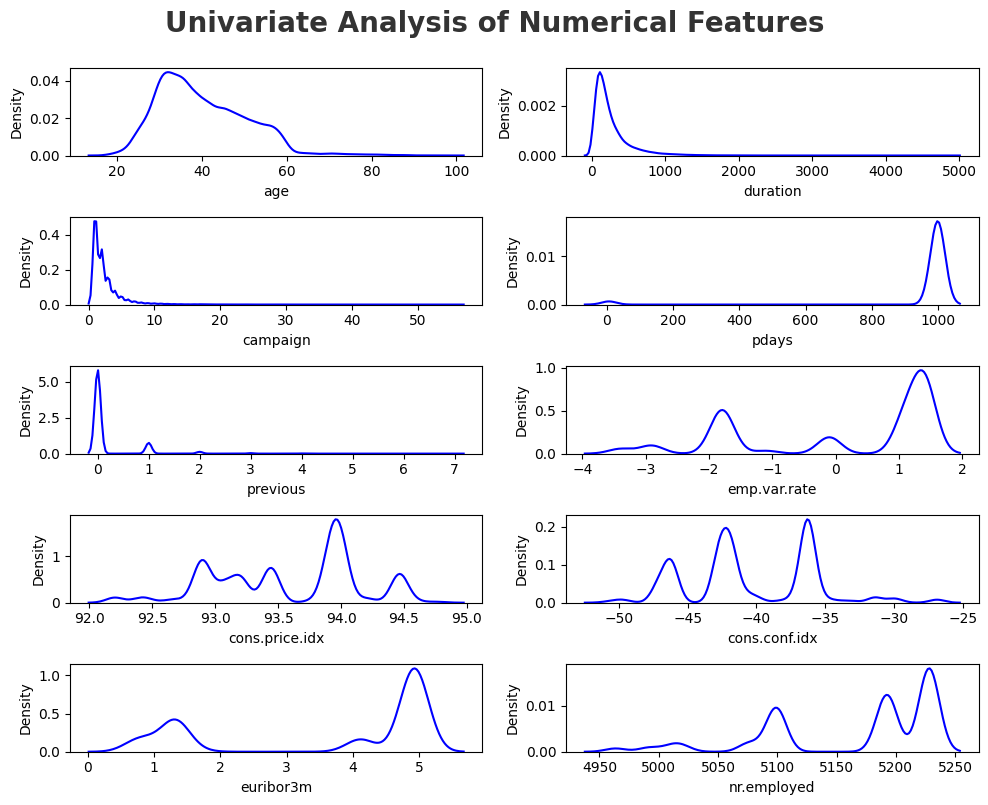

In [75]:
import math

n_features = len(numeric_features)
n_cols = 2  # For example, 2 columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()


    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
*  The most of the columns like skewed dataset due to the outliers


### Categorical Features

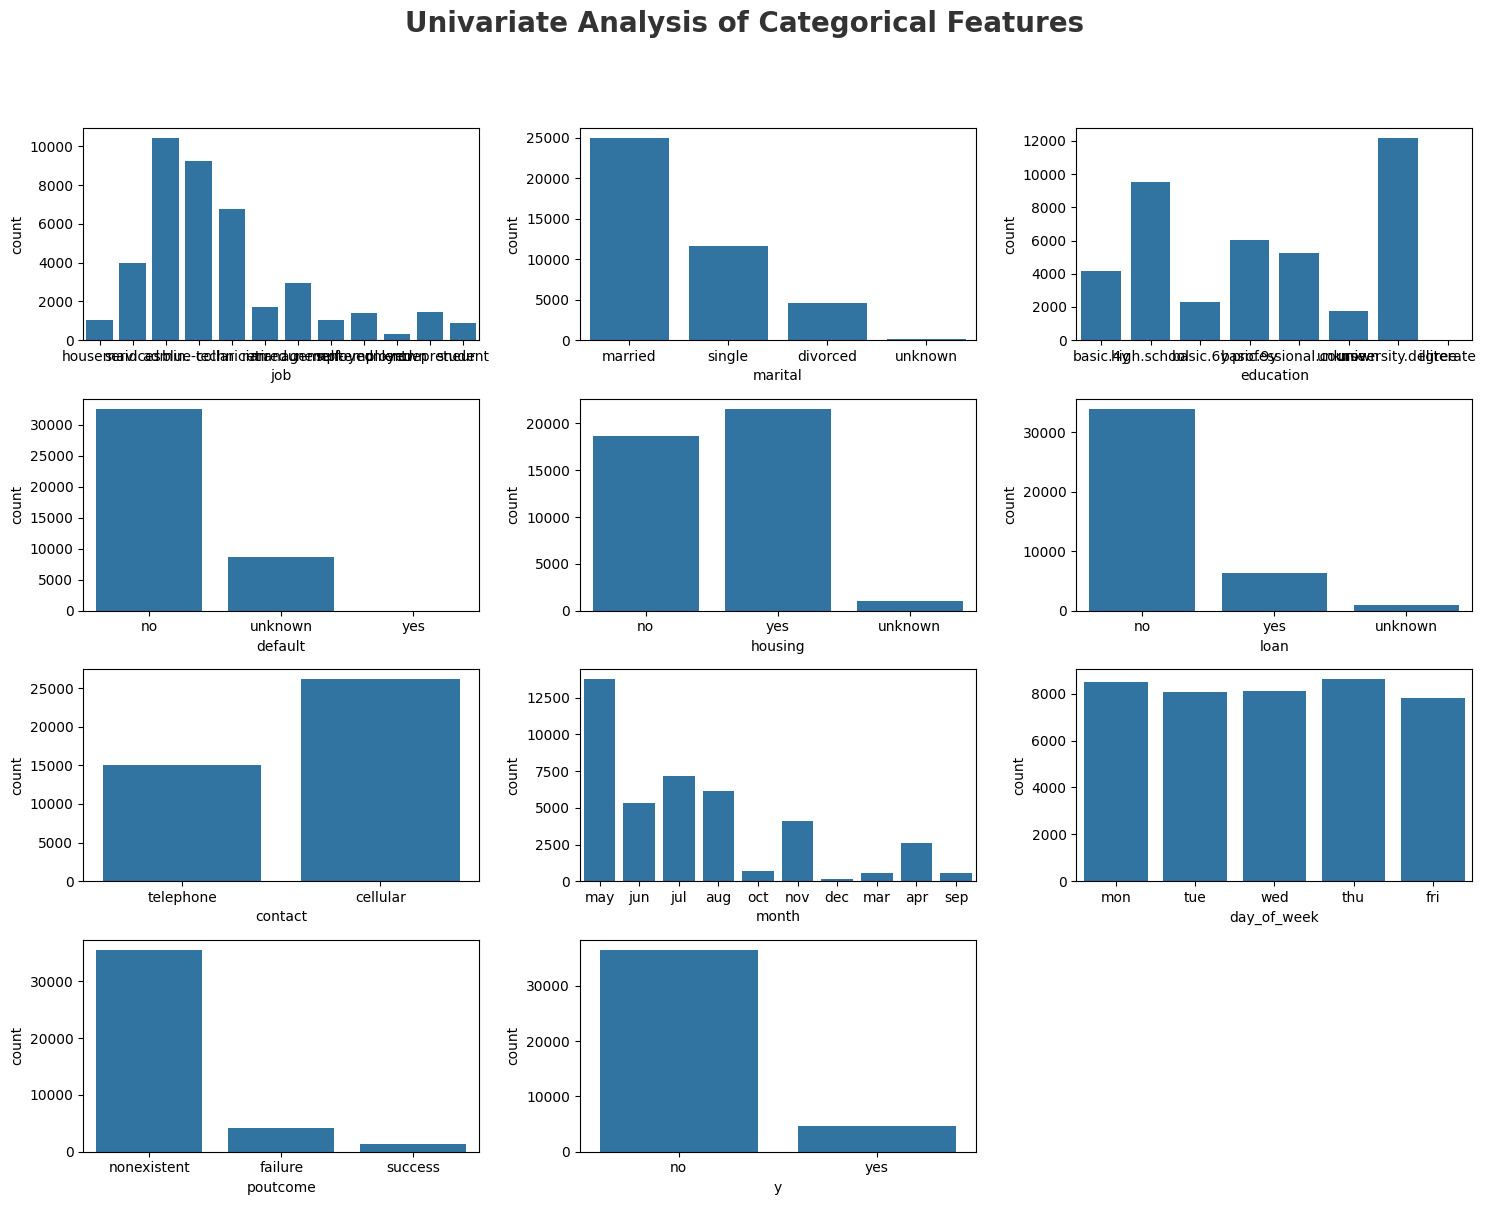

In [76]:
# categorical columns

import math

n_features = len(categorical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(15, n_rows *3 ))  # Adjust figure size based on rows
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
Job:
The most dominant categories are "blue-collar," "management," and "technician." These represent the largest groups in the dataset.

Marital Status:
"Married" dominates this category, with significantly more individuals in this group than "single" or "divorced."
Education:

"University degree" and "high school" are the dominant categories. "Basic education" also has a noticeable presence, but other categories have fewer instances.
Default on Credit:

The "no" category dominates, meaning most individuals do not have a default on their credit.
Housing Loan:

The majority of individuals do not have a housing loan, making "no" the dominant category.
Personal Loan (Loan):

Similar to housing loans, most individuals do not have a personal loan, so "no" dominates here as well.
Contact:

"Cellular" is the dominant contact method, with almost double the instances of "telephone."
Month of Contact:

The months May, July, August, and October dominate in terms of the number of contacts.
Day of the Week:

The distribution is relatively even, but Tuesday, Wednesday, and Thursday have slightly higher contact numbers.
Previous Outcome of Campaign (poutcome):

"Nonexistent" dominates, meaning most individuals were not part of any prior campaign.
Subscription (y):
"No" dominates this column, as most individuals did not subscribe to the term deposit.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [77]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 3 discrete features : ['previous', 'emp.var.rate', 'nr.employed']

We have 7 continuous_features : ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


### Check Multicollinearity in Numerical features

In [78]:
cor=df[numeric_features].corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


**Insights**
 - There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e y**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [79]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['y'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Reject Null Hypothesis
4,housing,Fail to Reject Null Hypothesis
5,loan,Fail to Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,day_of_week,Reject Null Hypothesis
9,poutcome,Reject Null Hypothesis


**Report** 
* Here Housing and loan fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [80]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [81]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


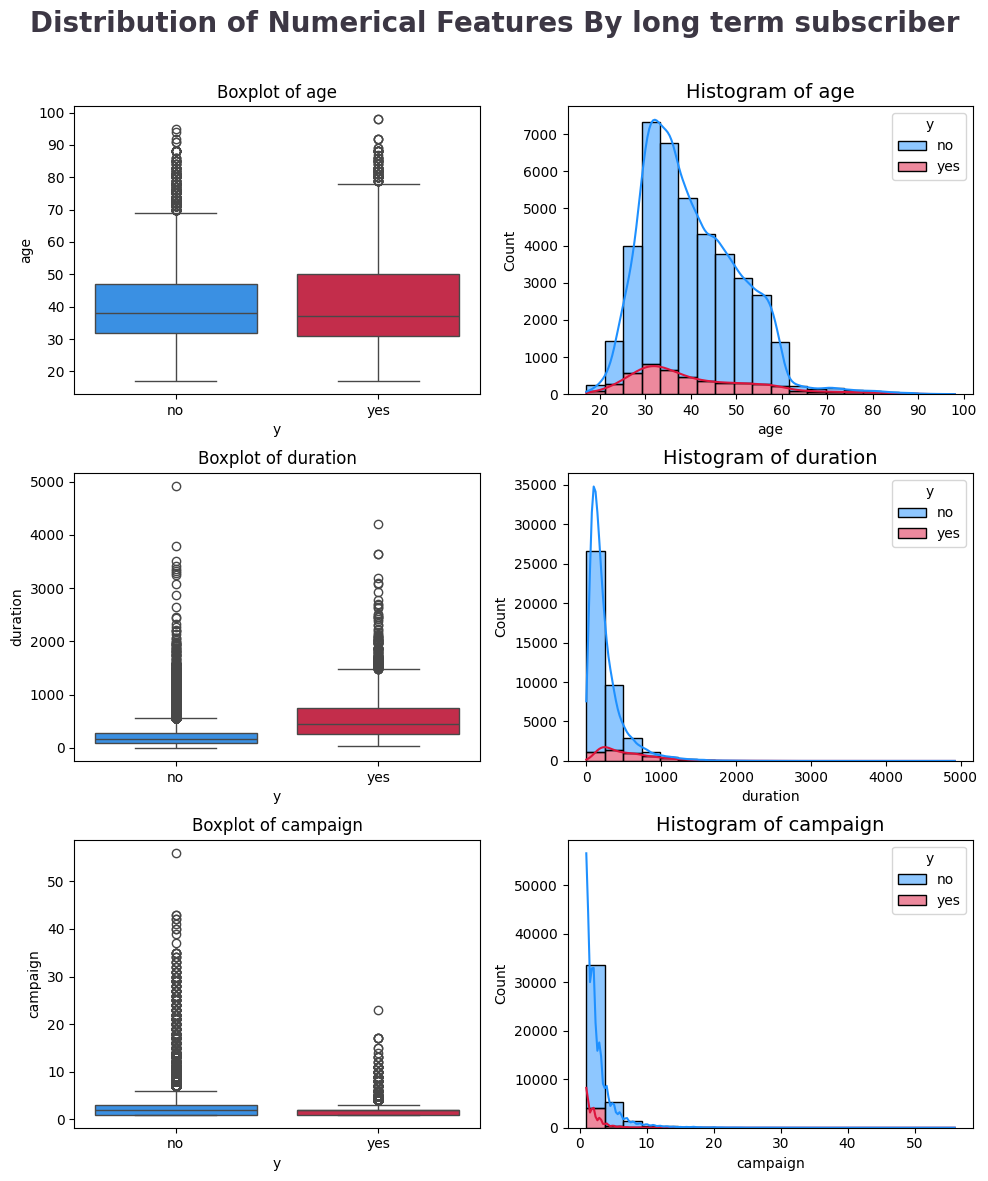

In [82]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

# Figure title
fig.suptitle('Distribution of Numerical Features By long term subscriber', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

# Loop through the features
for i, col in enumerate(continues_features[:3]):  # Ensure no more than 3 features
    # Boxplot for each feature
    sns.boxplot(data=df, x='y', y=col, palette=clr1, ax=ax[i, 0])  # Ensure 'y' is the correct column name
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram for each feature
    sns.histplot(data=df, x=col, hue='y', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])  # Ensure 'y' is the correct column name
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.90)

# Save the figure if needed
# plt.savefig('images/multivariate_num.png')

plt.show()


## Initial Analysis Report

* **boxplot of age, duration and campaingn has many outliers which can be Handled in Feature Engineering and `duration and campaingn` is Right Skewed.**


## 4. Visualization

### 4.1 Visualize the Target Feature

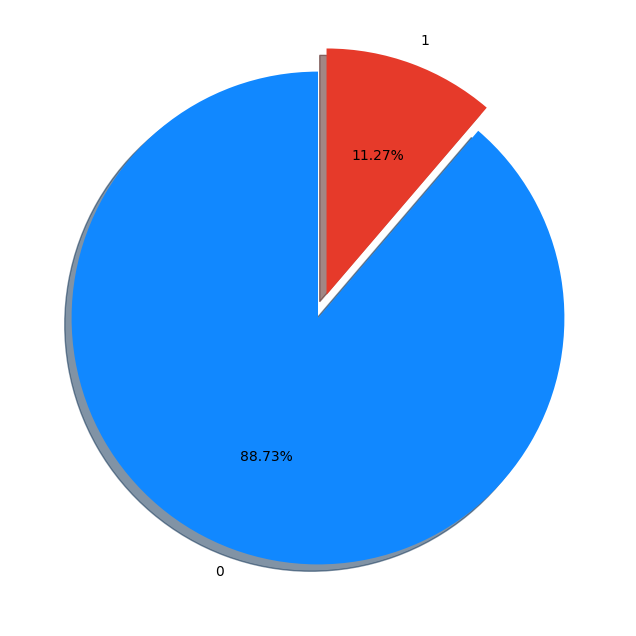

In [83]:
percentage = df.y.value_counts(normalize=True)*100
labels = ["0","1"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here 0 value has more count than the 1 value of the dataset.

In [85]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 4.2 Does applicant job has any impact on long term deposit ?

In [86]:
#group data by continent and their count of case_status
df.groupby('job')['y'].value_counts(normalize=True).to_frame()*100

proportion
job           y              
admin.        no    87.027442
              yes   12.972558
blue-collar   no    93.105684
              yes    6.894316
entrepreneur  no    91.483516
              yes    8.516484
housemaid     no    90.000000
              yes   10.000000
management    no    88.782490
              yes   11.217510
retired       no    74.767442
              yes   25.232558
self-employed no    89.514426
              yes   10.485574
services      no    91.861930
              yes    8.138070
student       no    68.571429
              yes   31.428571
technician    no    89.173958
              yes   10.826042
unemployed    no    85.798817
              yes   14.201183
unknown       no    88.787879
              yes   11.212121

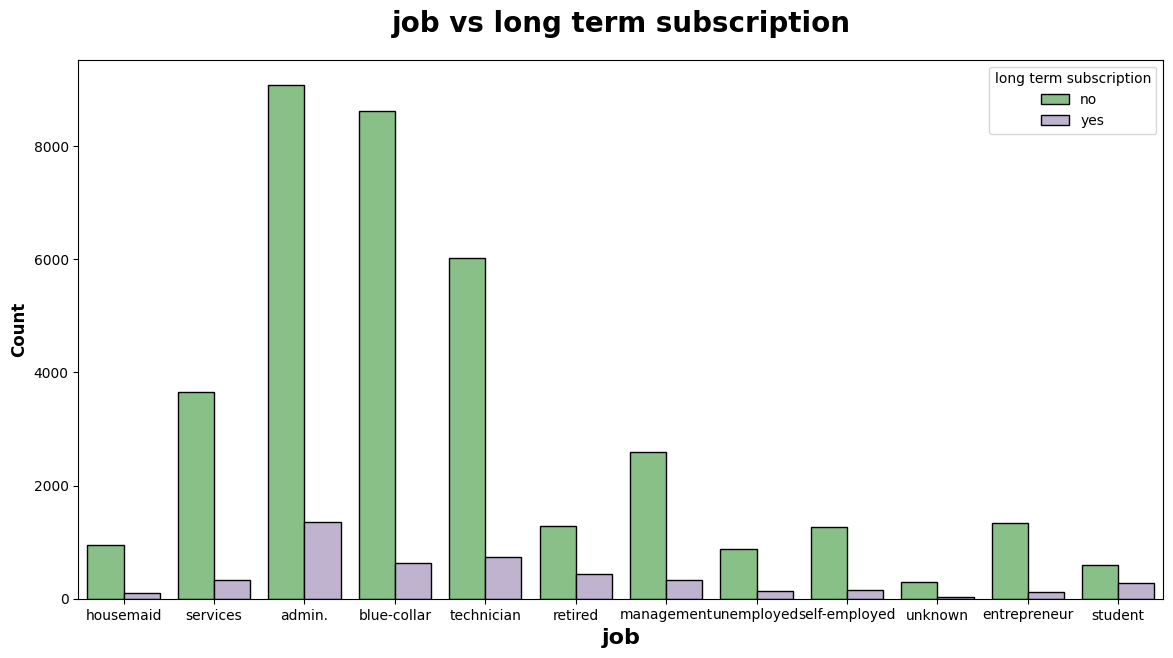

In [88]:
plt.subplots(figsize=(14,7))
sns.countplot(x="job",hue="y", data=df, ec = "black",palette="Accent")
plt.title("job vs long term subscription", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("job", weight="bold", fontsize=16)
plt.legend(title="long term subscription", fancybox=True)
plt.show()

In [20]:
df2 = df.copy()

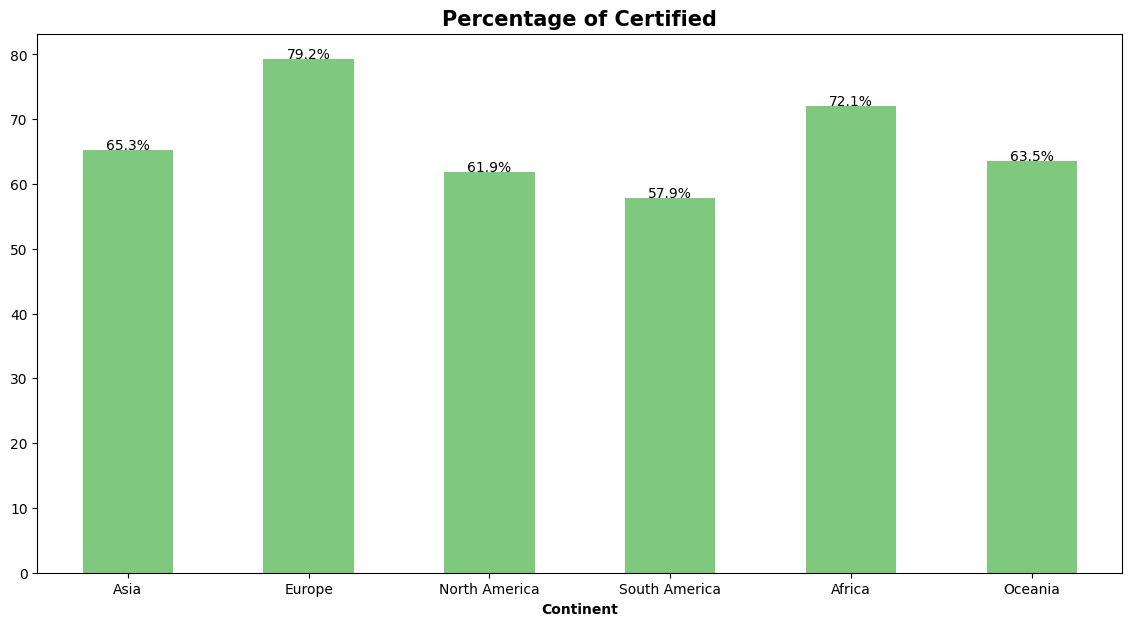

In [21]:
plt.figure(figsize=[14,7])

(100*df2[df2["y"].isin(['0'])]['job'].value_counts()/df2['job'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**
* As per the Chart Asia applicants applied more than other continents.
* 43% of Certified applications are from Asia.
* This is followed by Europe with 11% of Certified applications.
* Highest chance of getting certified if you are from `Europe` and followed by `Africa`

### 4.3 Does applicant education has any impact on Visa status ?

In [22]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

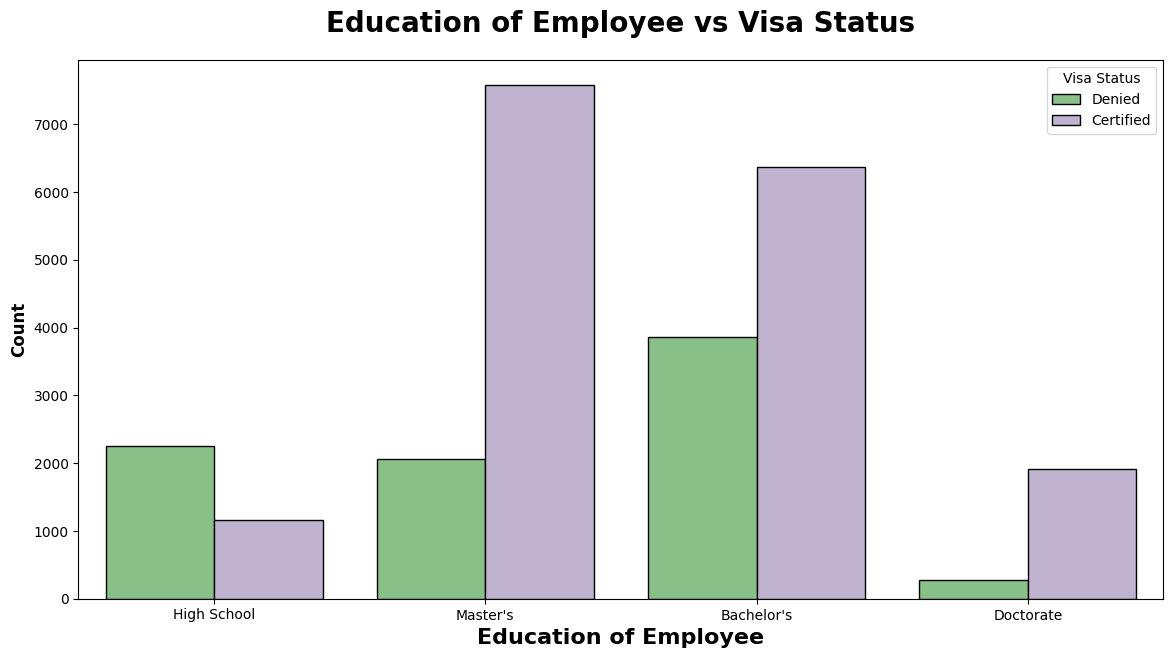

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

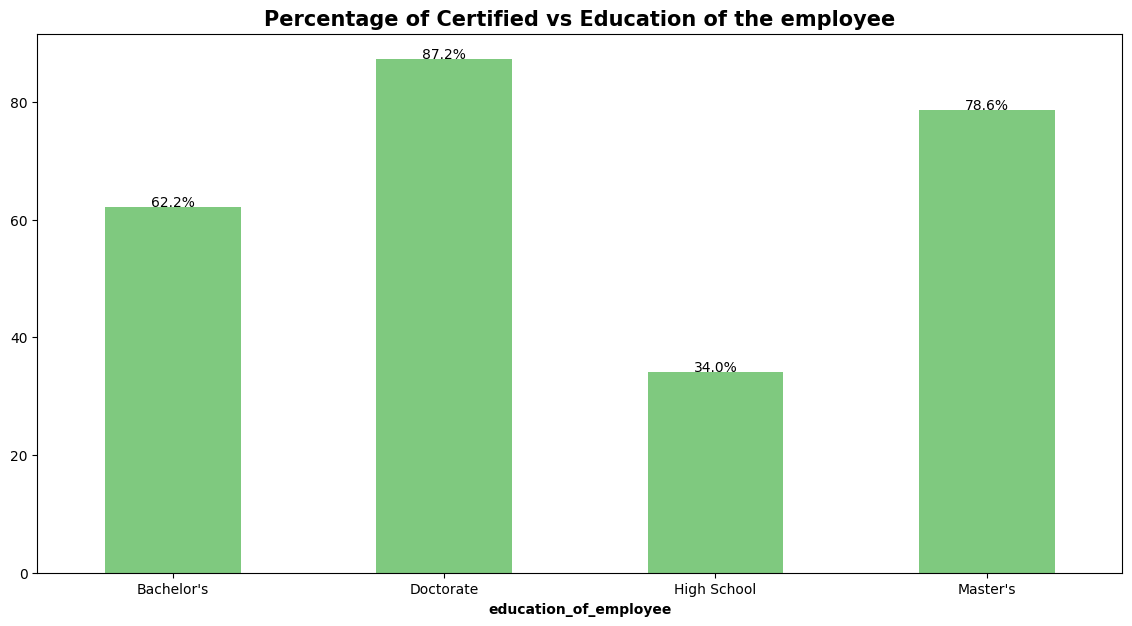

In [24]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**
- education status has high impact
- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others.

### 4.4 Does applicant's previous work experience has any impact on Visa status ?

In [25]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

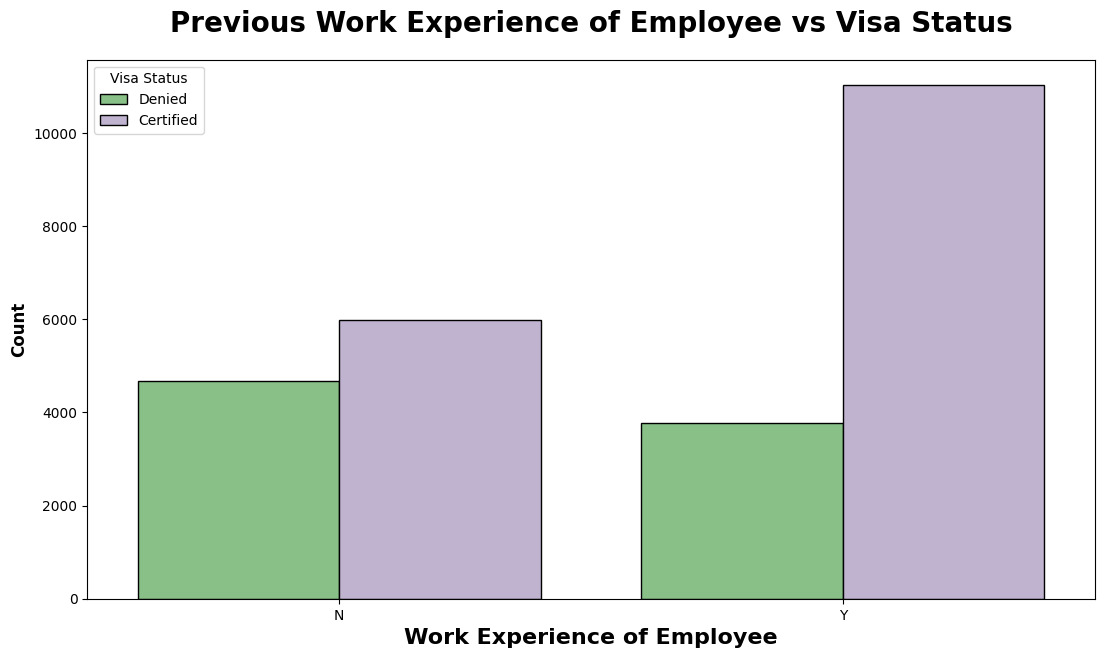

In [26]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

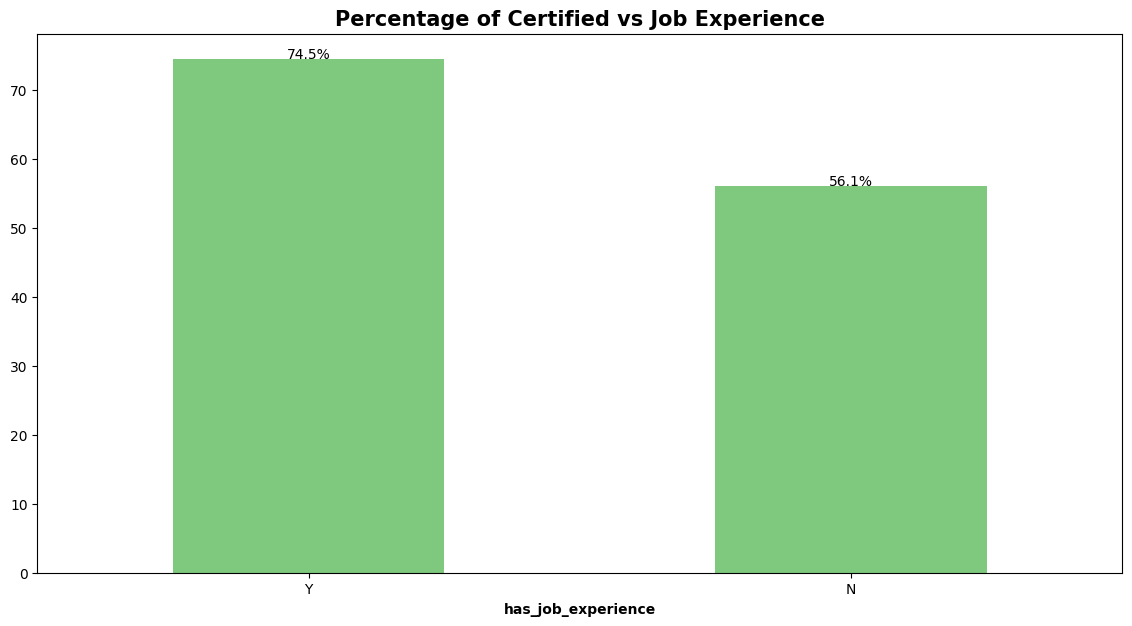

In [27]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### 4.5 If the Employee requires job training, does it make any impact on visa status?

In [28]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

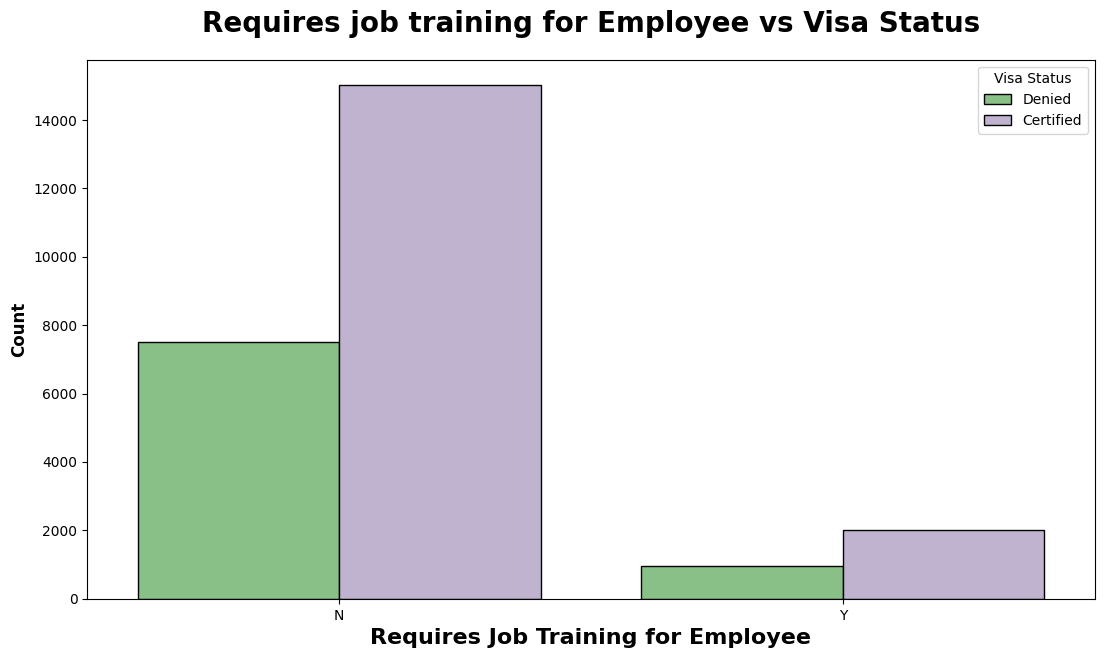

In [29]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

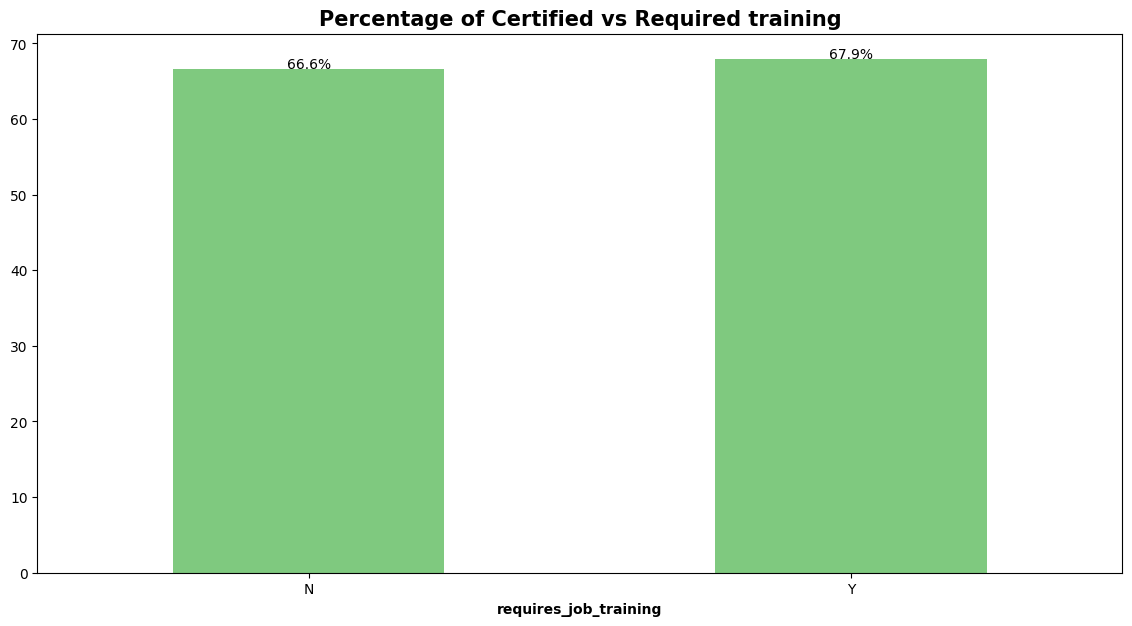

In [30]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* If employee requires job training and it doesn't have any effect on Visa status.
* 88% of applicant don't require job training. 
* 63% of people who doesnt want job training got certified.
* For employees who require job training 67% of people get certified.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### 4.6 Does Number of employees of employer has any impact on Visa status?

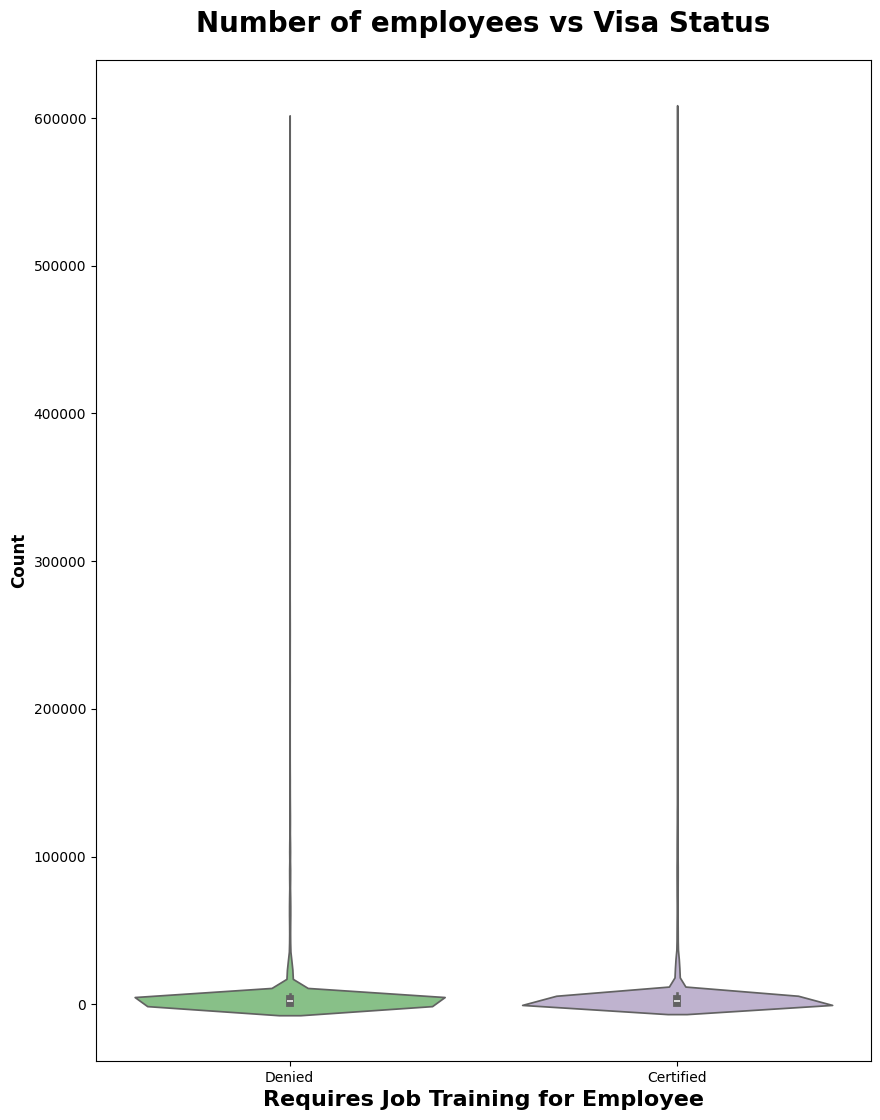

In [31]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.7 Wages and its impact on Visa status

In [32]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

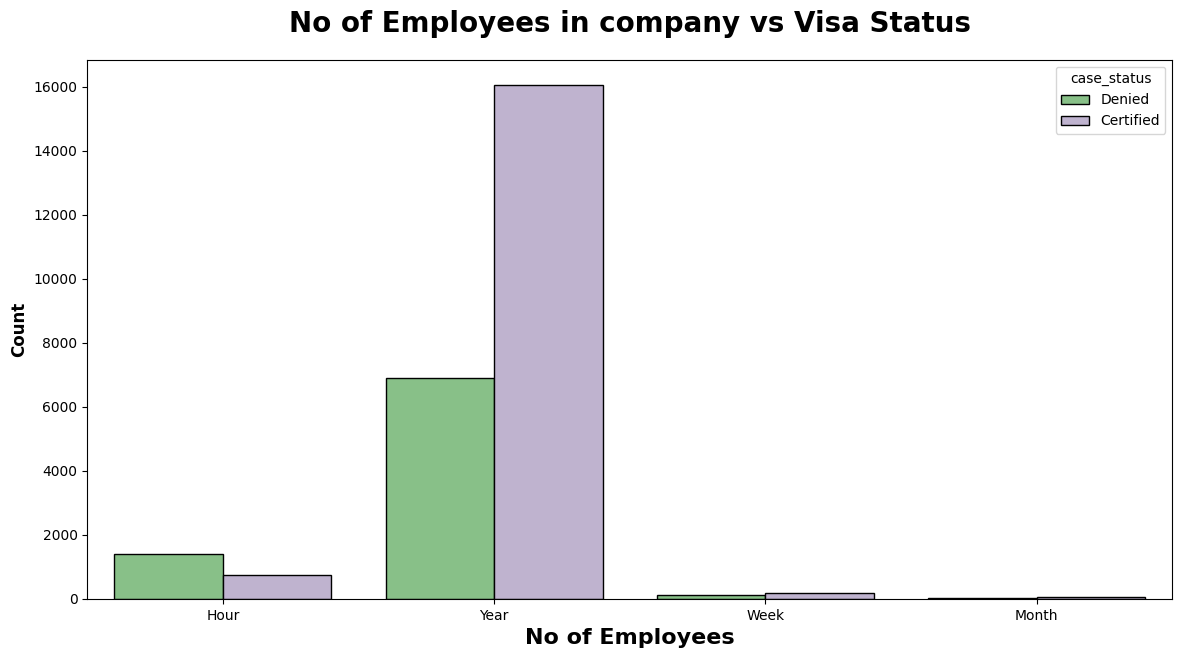

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

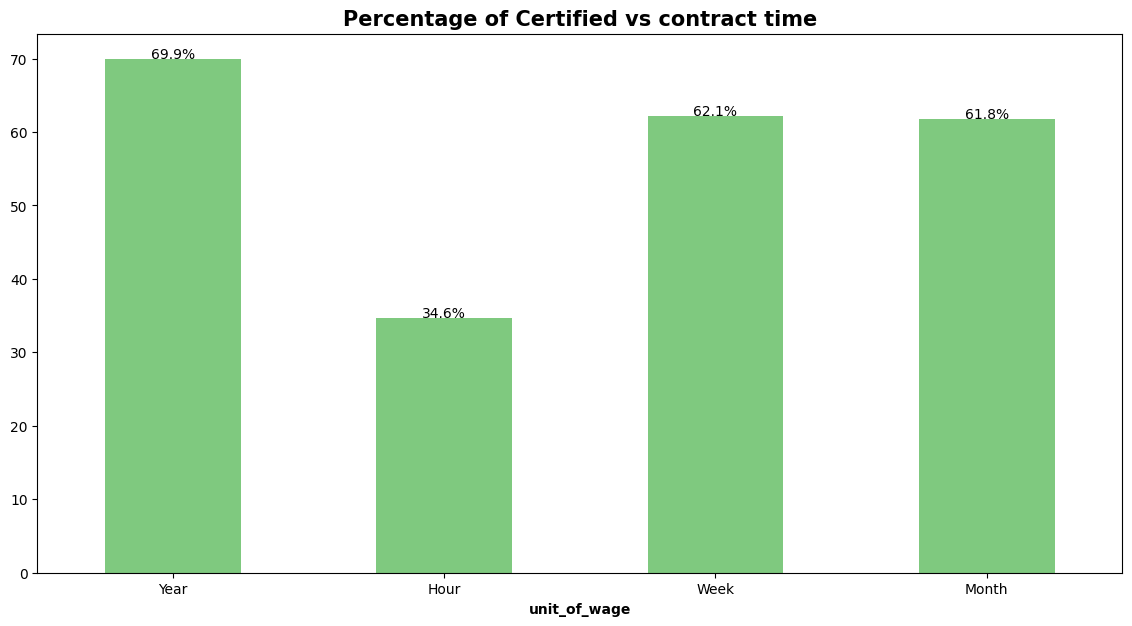

In [34]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

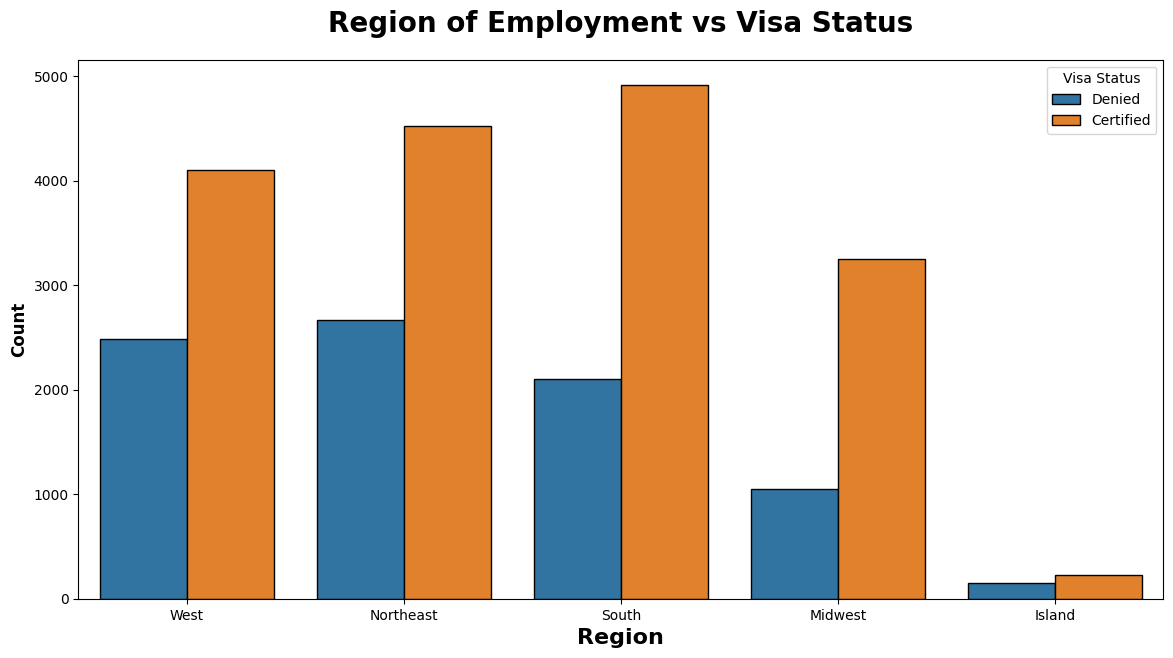

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

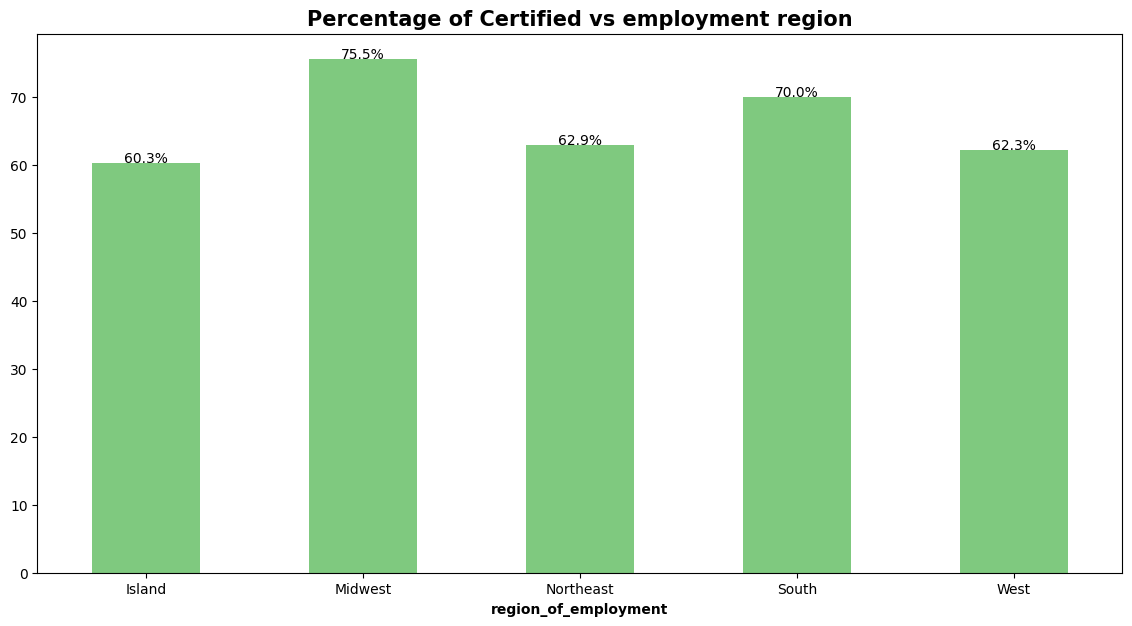

In [36]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for `midwest` followed by `South` region

### 4.8 Does Prevailing wage has any impact on Visa status ?

In [37]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

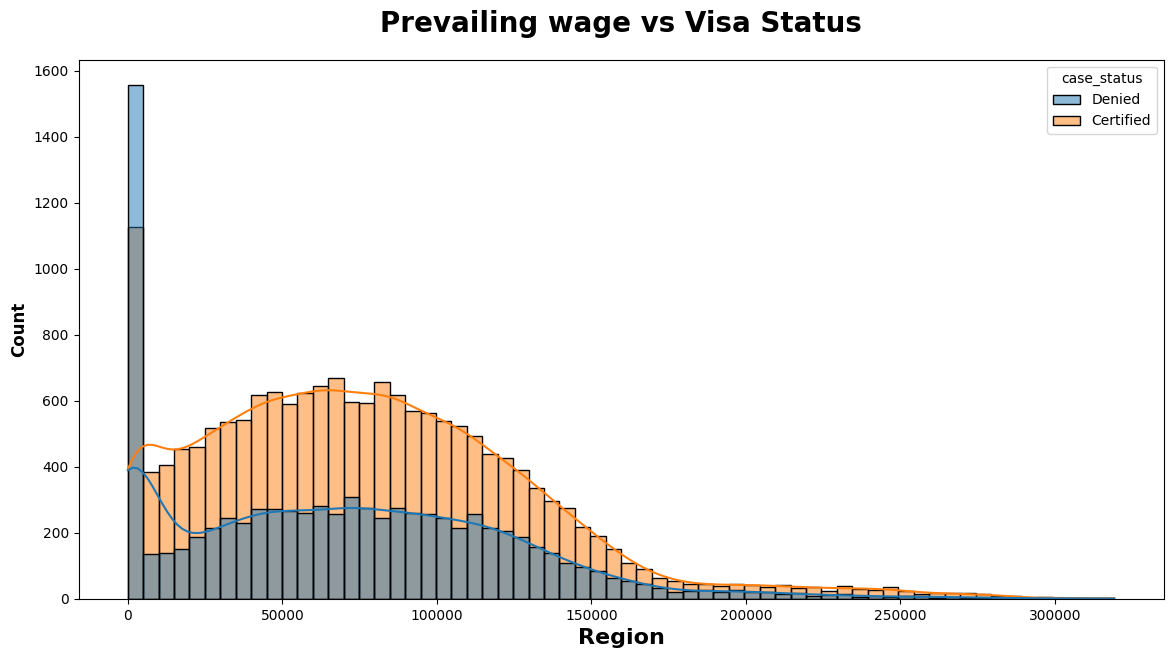

In [38]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 Prevailing wage based on Education

In [39]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


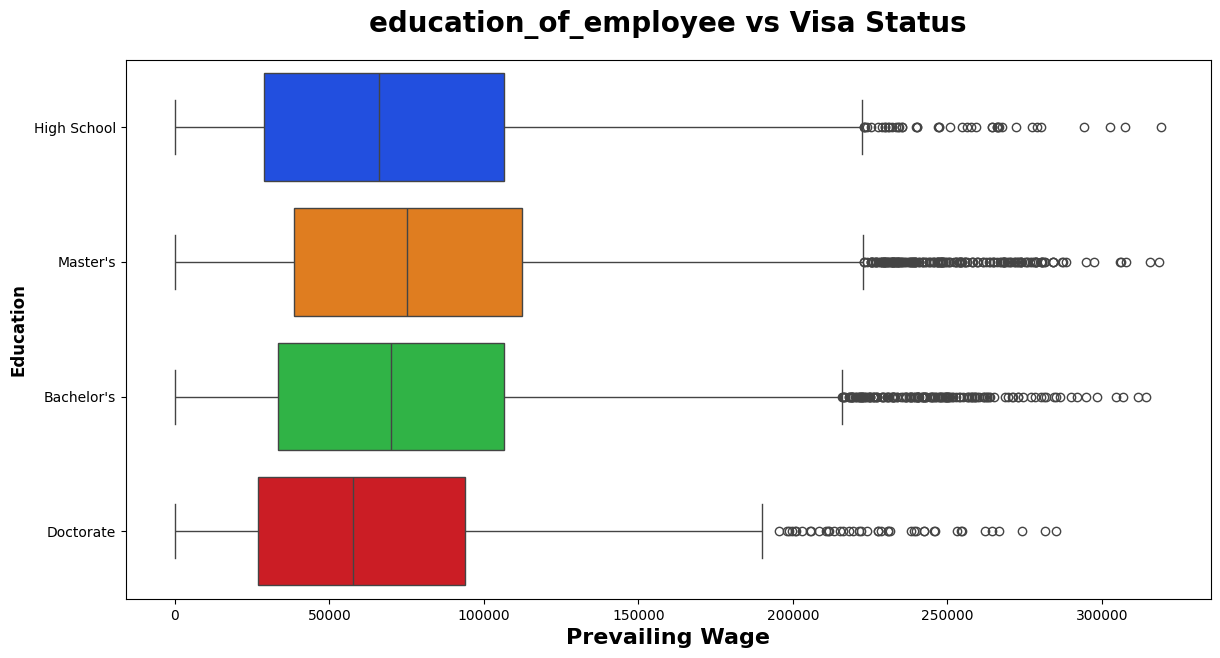

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

#### 4.8.2 Prevailing wage based on Job experience

In [41]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

In [42]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


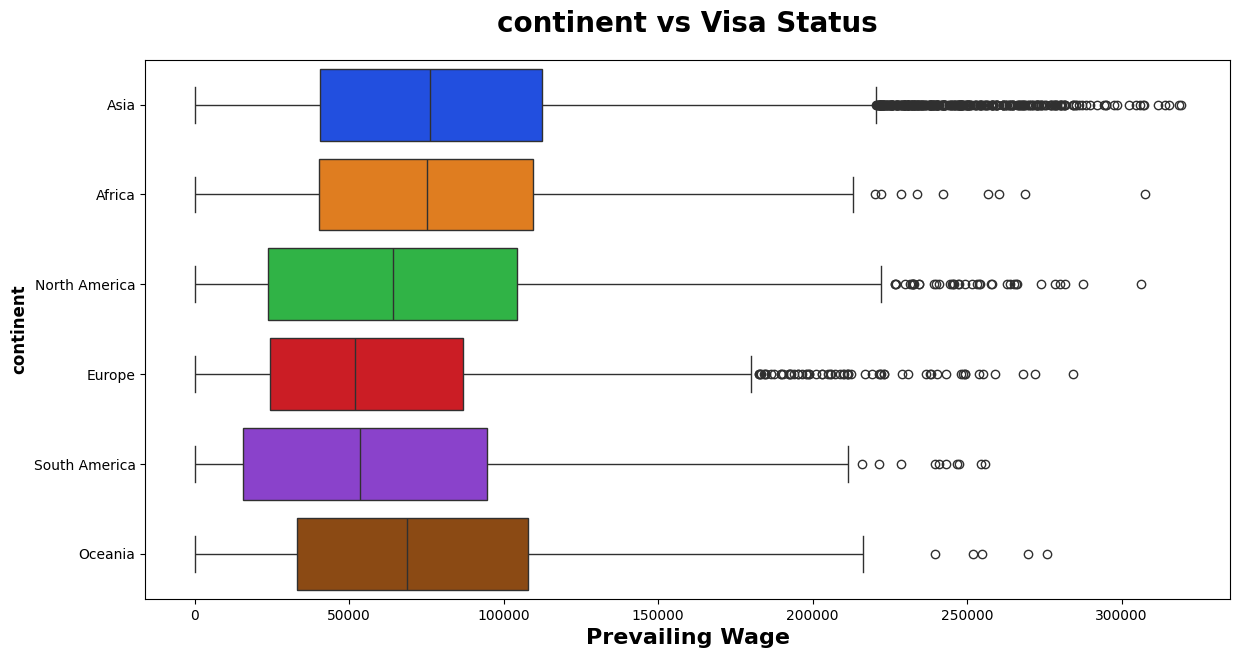

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

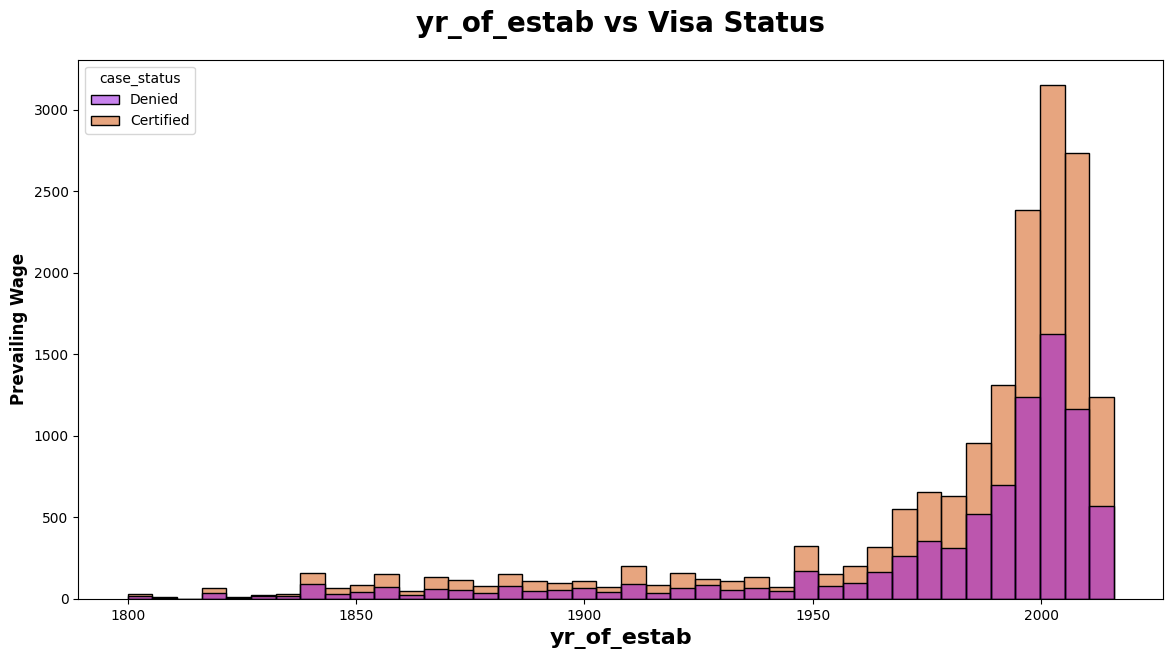

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

In [45]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################